公众号：菜J学Python 作者：J哥

## 导入数据分析库

In [20]:
import pandas as pd
import numpy as np
import os
import sys

In [21]:
os.chdir(os.getcwd())
os.getcwd()
os.listdir('.')

['.vscode', 'tengxun_danmu.py', '令人心动的offer', '令人心动的offer弹幕分析.ipynb']

## 合并弹幕数据

In [22]:
df1 = pd.read_csv("./令人心动的offer/面试篇.csv")
df1["期数"] = "面试篇"
df2 = pd.read_csv("./令人心动的offer/第1期.csv")
df2["期数"] = "第1期"
df3 = pd.read_csv("./令人心动的offer/第2期.csv")
df3["期数"] = "第2期"
df4 = pd.read_csv("./令人心动的offer/第3期.csv")
df4["期数"] = "第3期"
df = pd.concat([df1,df2,df3,df4])
df.sample(10)

,Unnamed: 0,用户名,内容,会员等级,评论时间点,评论点赞,评论id,期数
3636,0,NaN,饮料果汁不健康，茶健康,0,628,2,6735135413927137265,第2期
35761,0,NaN,感冒和熬夜真的状态不行,0,5955,0,6734884719714354428,第2期
8816,0,NaN,他不是不说 是说不上话,0,1594,0,6738742165734101564,第3期
46382,0,NaN,谁说的毒打哈哈哈,0,7905,3,6738090264143005218,第3期
50381,0,NaN,时长好评,4,8720,2,6732328978267780842,第1期
40920,0,Super Power,丁辉表现的也很好了，感觉有点伤心😔,0,6695,32,6734840832659223996,第2期
10991,0,NaN,职场鹅 : 哈哈哈哈,4,1821,9,6734806294495506977,第2期
25070,0,NaN,对方根本不会让步，也没有谈的必要,0,4192,2,6738130707098566909,第3期
42765,0,猫豆,干饭鹅 : 丁辉真的辩的很好啊,2,6961,41,6734833662938301147,第2期
3183,0,NaN,干饭鹅 : 丁辉加油，丁辉加油，丁辉加油，丁辉加油，丁辉加油，丁辉加油，,5,562,29,6734797426285277269,第2期


## 删除重复数据

In [23]:
df = df.drop_duplicates()

## 查看数据信息

In [24]:
df.info()
'''
发现问题：
1.字段名称可调整（个人洁癖）
2.Unnamed字段多余
3.用户名字段有缺失值，但不影响分析
4.评论时间点字段类型需要调整
5.评论id对分析无意义，可删除
'''

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170905 entries, 0 to 51987
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  170905 non-null  int64 
 1   用户名         62971 non-null   object
 2   内容          170904 non-null  object
 3   会员等级        170905 non-null  int64 
 4   评论时间点       170905 non-null  int64 
 5   评论点赞        170905 non-null  int64 
 6   评论id        170905 non-null  int64 
 7   期数          170905 non-null  object
dtypes: int64(5), object(3)
memory usage: 11.7+ MB


'\n发现问题：\n1.字段名称可调整（个人洁癖）\n2.Unnamed字段多余\n3.用户名字段有缺失值，但不影响分析\n4.评论时间点字段类型需要调整\n5.评论id对分析无意义，可删除\n'

## 重命名字段

In [25]:
df = df.rename(columns={'用户名':'用户昵称','内容':'弹幕内容','评论时间点':'发送时间','评论点赞':'弹幕点赞','期数':'所属期数'})

## 选择数据

In [26]:
#过滤到不需要的数据字段
df = df[["用户昵称","弹幕内容","会员等级","发送时间","弹幕点赞","所属期数"]]
df.sample(10)

,用户昵称,弹幕内容,会员等级,发送时间,弹幕点赞,所属期数
2604,iceeeee,王颖飞有点像叮叮的感觉,0,428,6,第2期
42311,钟理添,詹秋怡也是写错了律师名字,0,7430,5,第1期
18060,NaN,丁辉比较真实,0,2951,0,第1期
9291,NaN,别人家的孩子呀，我还在干嘛,5,1353,7,面试篇
17595,全国人民,我感觉他会进,2,2882,6,第1期
20733,NaN,可是面试和简历中学习能力其实最不会被重视,0,3397,1,第1期
45602,NaN,瞿好呆啊,5,7712,10,第3期
5775,好好学习,这个关门规范,0,813,13,面试篇
3313,NaN,没印象,0,519,1,第1期
381,NaN,开看丞丞的新综艺了,0,32,4,面试篇


## 缺失值处理

In [27]:
df["用户昵称"] = df["用户昵称"].fillna("无名氏")

## 发送时间处理

In [28]:
def time_change(seconds):
    m, s = divmod(seconds, 60)
    h, m = divmod(m, 60)
    ss_time = "%d:%02d:%02d" % (h, m, s)
    print(ss_time)
    return ss_time
time_change(seconds=8888)

2:28:08


'2:28:08'

In [29]:
df["发送时间"] = df["发送时间"].apply(time_change)

2:21:09
2:21:06
2:21:09
2:21:06
2:21:09
2:21:08
2:21:08
2:21:09
2:21:06
2:21:06
2:21:08
2:21:06
2:21:06
2:21:07
2:21:08
2:21:07
2:21:08
2:21:06
2:21:08
2:21:05
2:21:08
2:21:09
2:21:05
2:21:09
2:21:09
2:21:07
2:21:06
2:21:08
2:21:09
2:21:07
2:21:07
2:21:07
2:21:07
2:21:07
2:21:05
2:21:05
2:21:05
2:21:05
2:21:05
2:21:05
2:21:04
2:21:04
2:21:01
2:21:00
2:21:04
2:21:04
2:21:04
2:21:04
2:21:04
2:21:03
2:21:04
2:21:02
2:21:00
2:21:03
2:21:03
2:21:03
2:21:03
2:21:02
2:21:01
2:21:02
2:21:02
2:21:02
2:21:01
2:21:00
2:21:03
2:21:03
2:21:02
2:21:02
2:21:01
2:21:02
2:21:26
2:21:29
2:21:27
2:21:25
2:21:26
2:21:27
2:21:28
2:21:28
2:21:27
2:21:28
2:21:28
2:21:25
2:21:27
2:21:26
2:21:29
2:21:27
2:21:29
2:21:26
2:21:25
2:21:26
2:21:25
2:21:29
2:21:29
2:21:26
2:21:27
2:21:28
2:21:29
2:21:26
2:21:29
2:21:27
2:21:38
2:21:37
2:21:38
2:21:36
2:21:38
2:21:36
2:21:37
2:21:38
2:21:38
2:21:35
2:21:37
2:21:39
2:21:39
2:21:36
2:21:37
2:21:37
2:21:37
2:21:39
2:21:36
2:21:39
2:21:39
2:21:36
2:21:37
2:21:35
2:21:39


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170905 entries, 0 to 51987
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   用户昵称    170905 non-null  object
 1   弹幕内容    170904 non-null  object
 2   会员等级    170905 non-null  int64 
 3   发送时间    170905 non-null  object
 4   弹幕点赞    170905 non-null  int64 
 5   所属期数    170905 non-null  object
dtypes: int64(2), object(4)
memory usage: 9.1+ MB


In [31]:
df['发送时间'] = pd.to_datetime(df['发送时间'])
#df['发送时间'] = df['发送时间'].apply(lambda x : x.strftime('%H:%M:%S'))

## 弹幕内容处理

In [32]:
df["弹幕内容"] = df["弹幕内容"].astype("str")

In [33]:
#定义机械压缩函数
def yasuo(st):
    for i in range(1,int(len(st)/2)+1):
        for j in range(len(st)):
            if st[j:j+i] == st[j+i:j+2*i]:
                k = j + i
                while st[k:k+i] == st[k+i:k+2*i] and k<len(st):   
                    k = k + i
                st = st[:j] + st[k:]    
    return st
yasuo(st="菜J学Python真的真的真的很菜很菜")

'菜J学Python真的很菜'

In [34]:
df["弹幕内容"] = df["弹幕内容"].apply(yasuo)

In [35]:
df['弹幕内容'] = df['弹幕内容'].str.extract(r"([\u4e00-\u9fa5]+)")
df = df.dropna()  #纯表情弹幕直接删除

## 情感评分

In [39]:
import paddlehub as hub
#这里使用了百度开源的成熟NLP模型来预测情感倾向
senta = hub.Module(name="senta_bilstm")
texts = df['弹幕内容'].tolist()
input_data = {'text':texts}
res = senta.sentiment_classify(data=input_data)
df['情感分值'] = [x['positive_probs'] for x in res]
#重采样至15分钟
df.index = df['发送时间']
data = df.resample('15min').mean().reset_index()

ModuleNotFoundError: No module named 'paddle'

In [ ]:
#清洗数据保存为EXCEL
#df.to_excel("/Users/wangjia/Desktop/offer/clean.xlsx",index=False)

## 可视化分析

### 情感可视化

In [340]:

import seaborn as sns
color_map = sns.light_palette('orange', as_cmap=True)  #light_palette调色板
data.style.background_gradient(color_map)


,发送时间,会员等级,弹幕点赞,情感分值
0,2020-12-01 00:00:00,0.785847,4.929743,0.663023
1,2020-12-01 00:15:00,0.813199,6.214804,0.605614
2,2020-12-01 00:30:00,0.832409,6.453032,0.552353
3,2020-12-01 00:45:00,0.815625,5.681529,0.563671
4,2020-12-01 01:00:00,0.833871,6.591810,0.558710
5,2020-12-01 01:15:00,0.838439,5.765975,0.551895
6,2020-12-01 01:30:00,0.817262,6.337173,0.579167
7,2020-12-01 01:45:00,0.843067,7.656683,0.540723
8,2020-12-01 02:00:00,0.780090,6.812335,0.547250
9,2020-12-01 02:15:00,0.827625,5.922306,0.660467


In [341]:
import pyecharts.options as opts
from pyecharts.charts import *
from pyecharts.globals import ThemeType  
c = (
        Line(init_opts=opts.InitOpts(theme=ThemeType.DARK))
       .add_xaxis(data["发送时间"].to_list())
       .add_yaxis('情感倾向', list(data["情感分值"].round(2)), is_smooth=True,is_connect_nones=True,areastyle_opts=opts.AreaStyleOpts(opacity=0.5))
       #.add_yaxis('弹幕点赞',list(df["弹幕点赞"].round(2)), is_smooth=True,areastyle_opts=opts.AreaStyleOpts(opacity=0.5))
       #.add_yaxis('会员等级',list(df["会员等级"].round(2)), is_smooth=True,areastyle_opts=opts.AreaStyleOpts(opacity=0.5))
       .set_global_opts(title_opts=opts.TitleOpts(title="情感倾向",subtitle="数据来源：腾讯视频 \t制图：菜J学Python",pos_left = 'left'))
    )
c.render_notebook()

In [342]:
df.head()

,用户昵称,弹幕内容,会员等级,发送时间,弹幕点赞,所属期数,情感分值
发送时间,,,,,,,
2020-12-01 00:00:29,S,第一,2,2020-12-01 00:00:29,6,面试篇,0.6845
2020-12-01 00:00:26,无名氏,来太早了,5,2020-12-01 00:00:26,6,面试篇,0.9894
2020-12-01 00:00:27,无名氏,有人么,0,2020-12-01 00:00:27,2,面试篇,0.1604
2020-12-01 00:00:29,无名氏,来了,0,2020-12-01 00:00:29,2,面试篇,0.5813
2020-12-01 00:00:27,无名氏,我来了,0,2020-12-01 00:00:27,4,面试篇,0.9167


### 弹幕发射机

In [343]:
df8 = df["用户昵称"].value_counts()[1:11]
df8 = df8.sort_values(ascending=True)
df8 = df8.tail(10)
print(df8.index.to_list())
print(df8.to_list())
c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    .add_xaxis(df8.index.to_list())
    .add_yaxis("",df8.to_list()).reversal_axis() #X轴与y轴调换顺序
    .set_global_opts(title_opts=opts.TitleOpts(title="弹幕发送数量TOP10",subtitle="数据来源：腾讯视频 \t制图：菜J学Python",pos_left = 'left'),
                       xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=13)), #更改横坐标字体大小
                       yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=13)), #更改纵坐标字体大小
                       )
    .set_series_opts(label_opts=opts.LabelOpts(font_size=16,position='right'))
    )
c.render_notebook()

['duck不必.', '来自黄土地的一粒沙子', '圣雪天使', '白龙吟', '中行个贷部信贷专员   吉恒', 'ベ☆小强呐', '。', '.', '亚静', '想太多de猫']
[128, 132, 140, 151, 152, 160, 163, 169, 170, 227]


### 会员等级分布

In [344]:
df2 = df["会员等级"].astype("str").value_counts()
print(df2)
df2 = df2.sort_values(ascending=False)
regions = df2.index.to_list()
values = df2.to_list()
c = (
        Pie(init_opts=opts.InitOpts(theme=ThemeType.DARK))
        .add("", list(zip(regions,values)))
        .set_global_opts(legend_opts = opts.LegendOpts(is_show = False),title_opts=opts.TitleOpts(title="会员等级分布",subtitle="数据来源：腾讯视频\t制图：菜J学Python",pos_top="0.5%",pos_left = 'left'))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="等级{b}占比:{d}%",font_size=14))
        
    )
c.render_notebook()

0    98543
3     7419
1     7153
4     6378
2     5272
5     4435
6     3127
7      254
8       24
Name: 会员等级, dtype: int64


### 所属期数情况

In [345]:
df7 = df["所属期数"].value_counts()
print(df7.index.to_list())
print(df7.to_list())
c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    .add_xaxis(df7.index.to_list())
    .add_yaxis("",df7.to_list()) 
    .set_global_opts(title_opts=opts.TitleOpts(title="各期弹幕数量",subtitle="数据来源：腾讯视屏 \t制图：菜J学Python",pos_left = 'left'),
                       xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=13)), #更改横坐标字体大小
                       yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=13)), #更改纵坐标字体大小
                       )
    .set_series_opts(label_opts=opts.LabelOpts(font_size=16,position='top'))
    )
c.render_notebook()

['第1期', '第2期', '第3期', '面试篇']
[42422, 38152, 34699, 17332]


### 弹幕内容词云

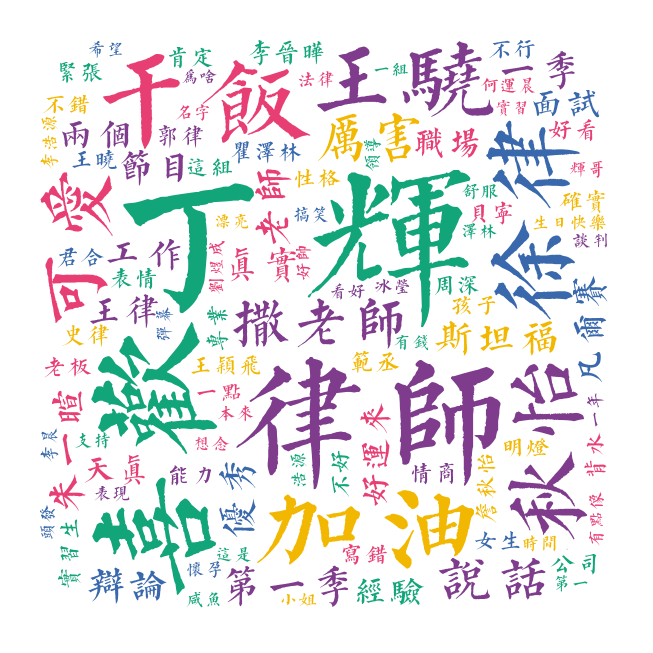

In [346]:
#数据处理库
import numpy as np
import pandas as pd
import glob
import re
import jieba 

#可视化库
import stylecloud
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from pyecharts.charts import *
from pyecharts import options as opts 
from pyecharts.globals import ThemeType  
from IPython.display import Image 

# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open("/Users/wangjia/Documents/2.技术公号/公号项目/数据分析/豆果美食数据分析/stop_words.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

    # 添加关键词
    my_words = ['撒老师', '范丞丞','第一季']  
    
    for i in my_words:
        jieba.add_word(i) 

    # 自定义停用词
    my_stop_words = ['好像', '真的','感觉']   
    stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected

# 绘制词云图
text1 = get_cut_words(content_series=df['弹幕内容'])
stylecloud.gen_stylecloud(text=' '.join(text1), max_words=100,
                          collocations=False,
                          font_path='字酷堂清楷体.ttf',
                          icon_name='fas fa-square',
                          size=653,
                          #palette='matplotlib.Inferno_9',
                          output_name='./offer.png')
Image(filename='./offer.png') 

In [347]:
tmp=[]
for i in df["弹幕内容"]:
    if "王骁" in i:
        tmp.append("王骁")
    elif "丁辉" in i:
        tmp.append("丁辉")
    elif "一暄" in i:
        tmp.append("朱一暄")
    elif "晋晔" in i:
        tmp.append("李晋晔")
    elif "泽林" in i:
        tmp.append("瞿泽林")
    elif "颖飞" in i:
        tmp.append("王颖飞")
    elif "秋怡" in i:
        tmp.append("詹秋怡")
    elif "煜成" in i:
        tmp.append("刘煜成")        
    else:
        tmp.append("其他")
df['人物提及'] = tmp

In [348]:
df8 = df["人物提及"].value_counts()[1:11]
print(df8.index.to_list())
print(df8.to_list())
c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    .add_xaxis(df8.index.to_list())
    .add_yaxis("",df8.to_list()) 
    .set_global_opts(title_opts=opts.TitleOpts(title="人物提及次数",subtitle="数据来源：腾讯视频 \t制图：菜J学Python",pos_left = 'left'),
                       xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=13)), #更改横坐标字体大小
                       yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=13)), #更改纵坐标字体大小
                       )
    .set_series_opts(label_opts=opts.LabelOpts(font_size=16,position='top'))
    )
c.render_notebook()

['丁辉', '詹秋怡', '王骁', '朱一暄', '瞿泽林', '李晋晔', '王颖飞', '刘煜成']
[9298, 2455, 2079, 1099, 1039, 908, 842, 526]


In [349]:
df.sample(20)

,用户昵称,弹幕内容,会员等级,发送时间,弹幕点赞,所属期数,情感分值,人物提及
发送时间,,,,,,,,
2020-12-01 00:01:49,无名氏,丞,0,2020-12-01 00:01:49,0,面试篇,0.6632,其他
2020-12-01 00:00:10,无名氏,第一,0,2020-12-01 00:00:10,13,第1期,0.6845,其他
2020-12-01 00:43:33,无名氏,最怕这种问题了,0,2020-12-01 00:43:33,1,面试篇,0.0371,其他
2020-12-01 00:44:01,无名氏,别的不说王骁的表情也太逗了,0,2020-12-01 00:44:01,0,第3期,0.0054,王骁
2020-12-01 01:37:21,无名氏,他们这组的案例简单点,0,2020-12-01 01:37:21,2,第3期,0.5615,其他
2020-12-01 02:03:43,无名氏,丁辉也有无限可能啊,0,2020-12-01 02:03:43,3,第2期,0.9830,丁辉
2020-12-01 00:10:49,无名氏,想到郭旭和那谁了,6,2020-12-01 00:10:49,17,第1期,0.9998,其他
2020-12-01 00:51:17,无名氏,倒数第一给倒数第二讲课,0,2020-12-01 00:51:17,6,第1期,0.0022,其他
2020-12-01 00:06:47,不再说~,好看啊,0,2020-12-01 00:06:47,0,第1期,0.9920,其他


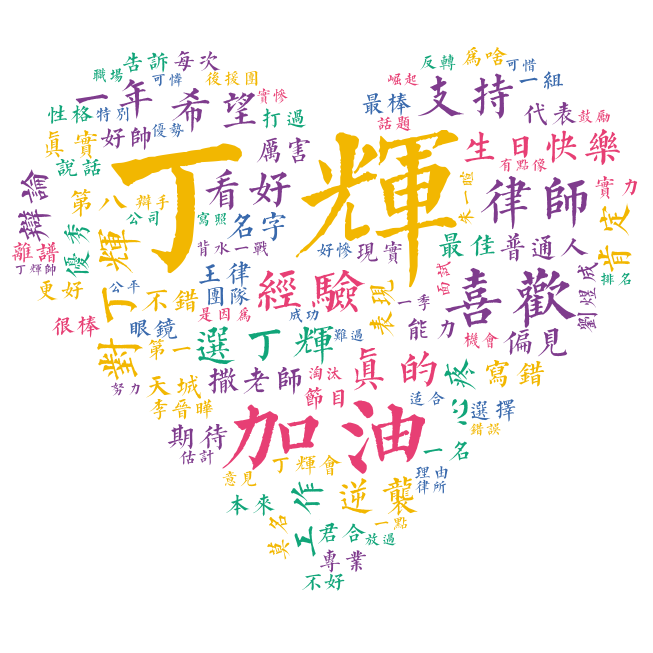

In [350]:
# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open("/Users/wangjia/Documents/2.技术公号/公号项目/数据分析/豆果美食数据分析/stop_words.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

    # 添加关键词
    my_words = ['', '']  
    
    for i in my_words:
        jieba.add_word(i) 

    # 自定义停用词
    my_stop_words = ['感觉', '确实']   
    stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected
dinghui = df[df["人物提及"]=="丁辉"]
text = get_cut_words(content_series=dinghui['弹幕内容'])
stylecloud.gen_stylecloud(text=' '.join(text), max_words=100,
                          collocations=False,
                          font_path='字酷堂清楷体.ttf',
                          icon_name='fas fa-heart',
                          #palette='matplotlib.Inferno_9',
                          size=653,
                          output_name='./dinghui.png')
Image(filename='./dinghui.png') 

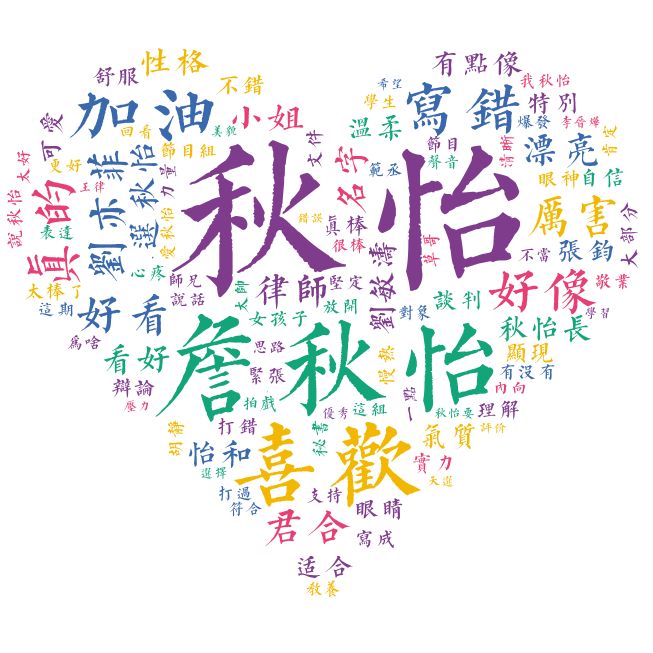

In [351]:
# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open("/Users/wangjia/Documents/2.技术公号/公号项目/数据分析/豆果美食数据分析/stop_words.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

    # 添加关键词
    my_words = ['', '']  
    
    for i in my_words:
        jieba.add_word(i) 

    # 自定义停用词
    my_stop_words = ['感觉', '确实']   
    stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected
qiuyi = df[df["人物提及"]=="詹秋怡"]
text = get_cut_words(content_series=qiuyi['弹幕内容'])
stylecloud.gen_stylecloud(text=' '.join(text), max_words=100,
                          collocations=False,
                          font_path='字酷堂清楷体.ttf',
                          icon_name='fas fa-heart',
                          #palette='matplotlib.Inferno_9',
                          size=653,
                          output_name='./ouhao.png')
Image(filename='./ouhao.png') 

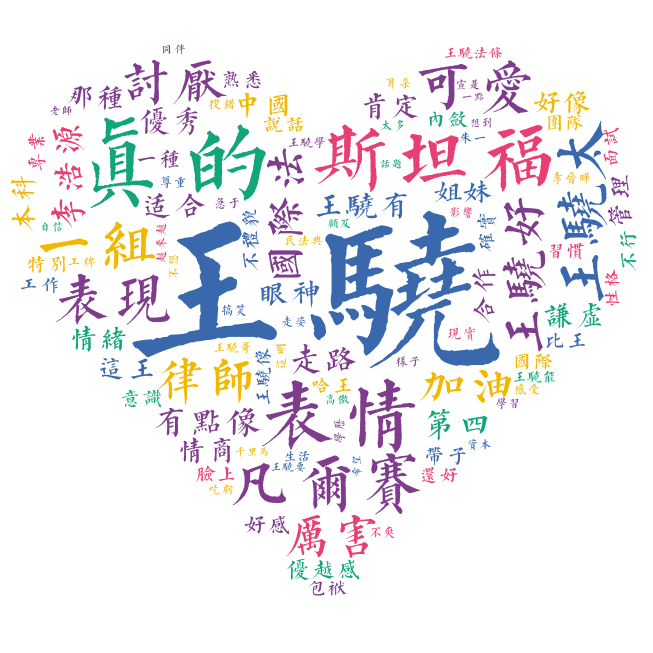

In [352]:
# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open("/Users/wangjia/Documents/2.技术公号/公号项目/数据分析/豆果美食数据分析/stop_words.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

    # 添加关键词
    my_words = ['', '']  
    
    for i in my_words:
        jieba.add_word(i) 

    # 自定义停用词
    my_stop_words = ['丁辉', '刘煜成','朱一暄','感觉','喜欢']   
    stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected
wangxiao = df[df["人物提及"]=="王骁"]
text = get_cut_words(content_series=wangxiao['弹幕内容'])
stylecloud.gen_stylecloud(text=' '.join(text), max_words=100,
                          collocations=False,
                          font_path='字酷堂清楷体.ttf',
                          icon_name='fas fa-heart',
                          #palette='matplotlib.Inferno_9',
                          size=653,
                          output_name='./wangxiao.png')
Image(filename='./wangxiao.png') 

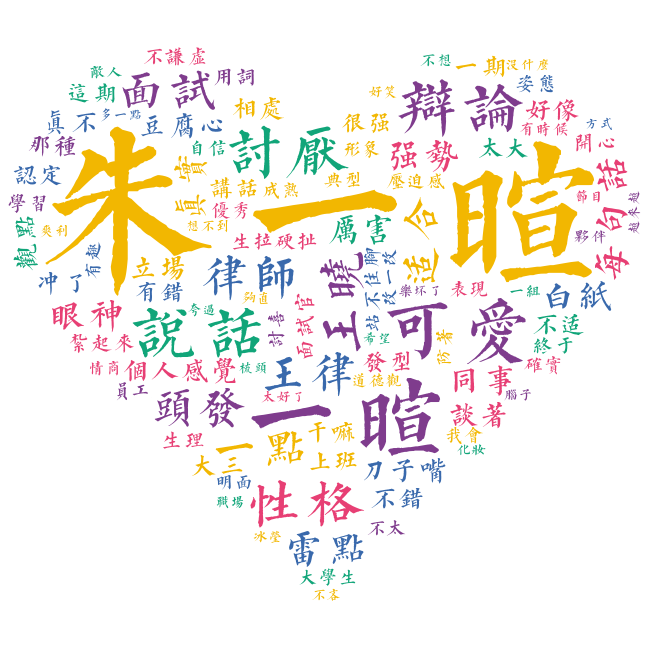

In [353]:
# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open("/Users/wangjia/Documents/2.技术公号/公号项目/数据分析/豆果美食数据分析/stop_words.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

    # 添加关键词
    my_words = ['朱一暄', '']  
    
    for i in my_words:
        jieba.add_word(i) 

    # 自定义停用词
    my_stop_words = ['丁辉', '刘煜成','真的','感觉','喜欢','王骁','李晋晔']   
    stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected
yixuan = df[df["人物提及"]=="朱一暄"]
text = get_cut_words(content_series=yixuan['弹幕内容'])
stylecloud.gen_stylecloud(text=' '.join(text), max_words=100,
                          collocations=False,
                          font_path='字酷堂清楷体.ttf',
                          icon_name='fas fa-heart',
                          #palette='matplotlib.Inferno_9',
                          size=653,
                          output_name='./yixuan.png')
Image(filename='./yixuan.png') 

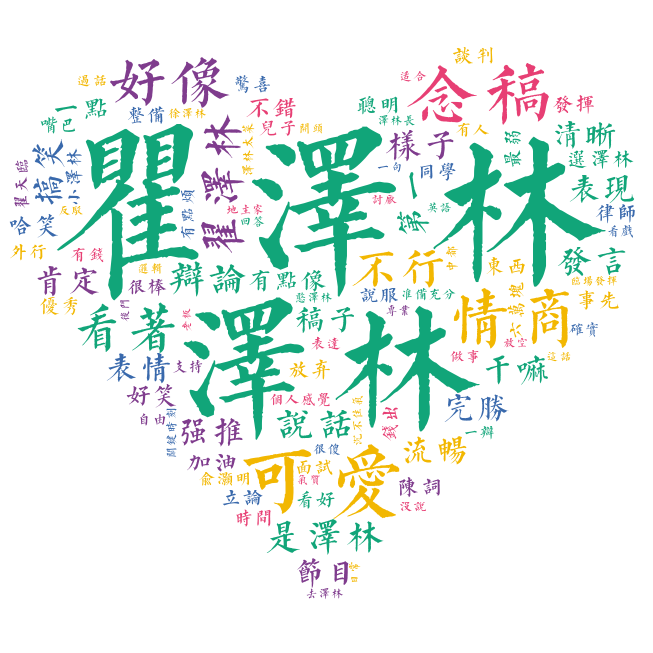

In [354]:
# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open("/Users/wangjia/Documents/2.技术公号/公号项目/数据分析/豆果美食数据分析/stop_words.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

    # 添加关键词
    my_words = ['朱一暄', '']  
    
    for i in my_words:
        jieba.add_word(i) 

    # 自定义停用词
    my_stop_words = ['丁辉', '刘煜成','真的','感觉','喜欢','王骁','李晋晔']   
    stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected
zelin = df[df["人物提及"]=="瞿泽林"]
text = get_cut_words(content_series=zelin['弹幕内容'])
stylecloud.gen_stylecloud(text=' '.join(text), max_words=100,
                          collocations=False,
                          font_path='字酷堂清楷体.ttf',
                          icon_name='fas fa-heart',
                          #palette='matplotlib.Inferno_9',
                          size=653,
                          output_name='./zelin.png')
Image(filename='./zelin.png') 

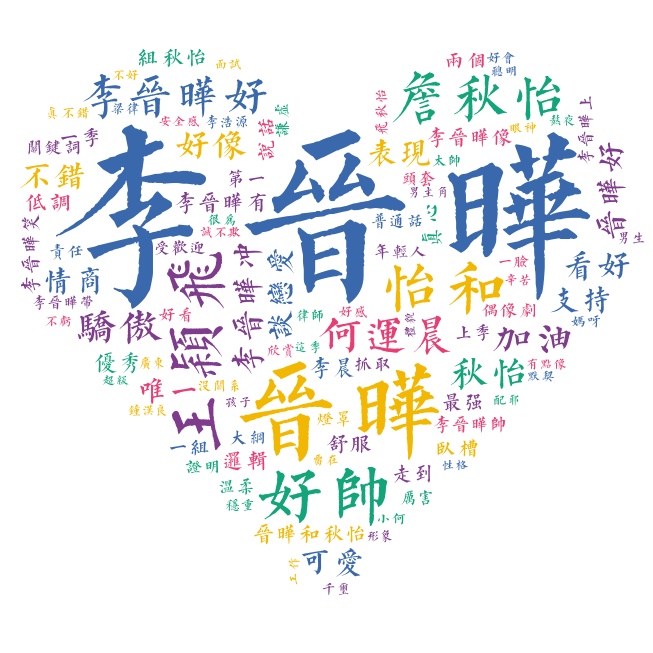

In [355]:
# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open("/Users/wangjia/Documents/2.技术公号/公号项目/数据分析/豆果美食数据分析/stop_words.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

    # 添加关键词
    my_words = ['朱一暄', '']  
    
    for i in my_words:
        jieba.add_word(i) 

    # 自定义停用词
    my_stop_words = ['丁辉', '刘煜成','真的','感觉','喜欢','王骁']   
    stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected
jinye = df[df["人物提及"]=="李晋晔"]
text = get_cut_words(content_series=jinye['弹幕内容'])
stylecloud.gen_stylecloud(text=' '.join(text), max_words=100,
                          collocations=False,
                          font_path='字酷堂清楷体.ttf',
                          icon_name='fas fa-heart',
                          #palette='matplotlib.Inferno_9',
                          size=653,
                          output_name='./jinye.png')
Image(filename='./jinye.png') 

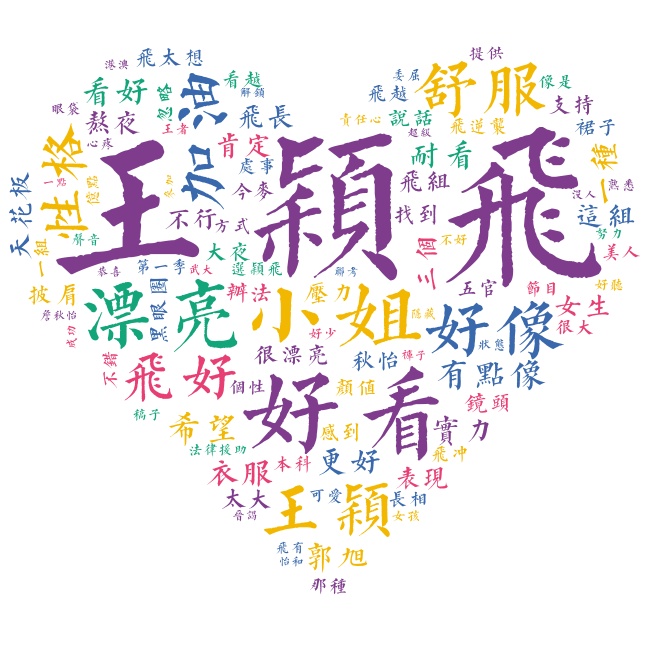

In [356]:
# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open("/Users/wangjia/Documents/2.技术公号/公号项目/数据分析/豆果美食数据分析/stop_words.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

    # 添加关键词
    my_words = ['朱一暄', '']  
    
    for i in my_words:
        jieba.add_word(i) 

    # 自定义停用词
    my_stop_words = ['丁辉', '刘煜成','真的','感觉','喜欢','王骁']   
    stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected
yinfei = df[df["人物提及"]=="王颖飞"]
text = get_cut_words(content_series=yinfei['弹幕内容'])
stylecloud.gen_stylecloud(text=' '.join(text), max_words=100,
                          collocations=False,
                          font_path='字酷堂清楷体.ttf',
                          icon_name='fas fa-heart',
                          #palette='matplotlib.Inferno_9',
                          size=653,
                          output_name='./yinfei.png')
Image(filename='./yinfei.png') 

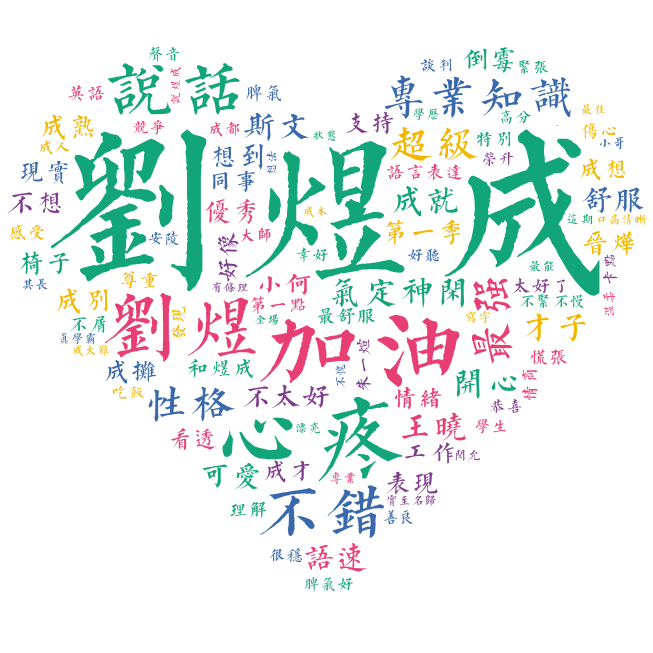

In [357]:
# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open("/Users/wangjia/Documents/2.技术公号/公号项目/数据分析/豆果美食数据分析/stop_words.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

    # 添加关键词
    my_words = ['朱一暄', '']  
    
    for i in my_words:
        jieba.add_word(i) 

    # 自定义停用词
    my_stop_words = ['丁辉','真的','感觉','喜欢','王骁']   
    stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected
yucheng = df[df["人物提及"]=="刘煜成"]
text = get_cut_words(content_series=yucheng['弹幕内容'])
stylecloud.gen_stylecloud(text=' '.join(text), max_words=100,
                          collocations=False,
                          font_path='字酷堂清楷体.ttf',
                          icon_name='fas fa-heart',
                          #palette='matplotlib.Inferno_9',
                          size=653,
                          output_name='./yucheng.png')
Image(filename='./yucheng.png') 

In [358]:
#df.to_excel("/Users/wangjia/Desktop/offer/clean1.xlsx")

In [359]:
df[df["用户昵称"]=="想太多de猫"].sample(10)

,用户昵称,弹幕内容,会员等级,发送时间,弹幕点赞,所属期数,情感分值,人物提及
发送时间,,,,,,,,
2020-12-01 00:06:34,想太多de猫,看这节目是要做笔记的,4,2020-12-01 00:06:34,3,第3期,0.0088,其他
2020-12-01 00:49:02,想太多de猫,所以说,4,2020-12-01 00:49:02,25,第2期,0.3881,其他
2020-12-01 00:40:32,想太多de猫,小辩手真的太可爱了,4,2020-12-01 00:40:32,22,第1期,0.9152,其他
2020-12-01 00:37:31,想太多de猫,好像和团战的步骤差不多呢,4,2020-12-01 00:37:31,4,第2期,0.9988,其他
2020-12-01 00:03:02,想太多de猫,深还是那么可爱,4,2020-12-01 00:03:02,4,第1期,0.9880,其他
2020-12-01 00:26:31,想太多de猫,小秋姐,4,2020-12-01 00:26:31,9,第2期,0.9753,其他
2020-12-01 00:31:02,想太多de猫,真的是辩论小能手,4,2020-12-01 00:31:02,6,面试篇,0.0160,其他
2020-12-01 01:16:01,想太多de猫,哇哦,4,2020-12-01 01:16:01,5,第1期,0.9905,其他
2020-12-01 00:15:54,想太多de猫,没有了眼镜的丁辉已经不再是丁辉了,4,2020-12-01 00:15:54,8,第3期,0.0044,丁辉


In [360]:
#重采样至15分钟
data1 = df[df["所属期数"]=="面试篇"]
data1.index = data1['发送时间']
data2 = data1.resample('15min').mean().reset_index()